# 0. INFORMAÇÕES DO GRUPO
---

Nomes e Números USP:

- Adriane Akemi Yamaguti - NUSP: 11915623
- Ariel Bor Cheng Chen - NUSP: 11877260
- Emerson Hideki Miady - NUSP: 11207943

# 1.0. Contexto

Este conjunto de dados clássico contém os preços e outros atributos de quase 54.000 diamantes.

O nosso objetivo é tentar prever os preços ideais para a venda dos diamantes, de acordo com algumas variáveis que irão ser descritas na seção 3.

Base de dados (Kaggle): clique [aqui](https://www.kaggle.com/datasets/shivam2503/diamonds).

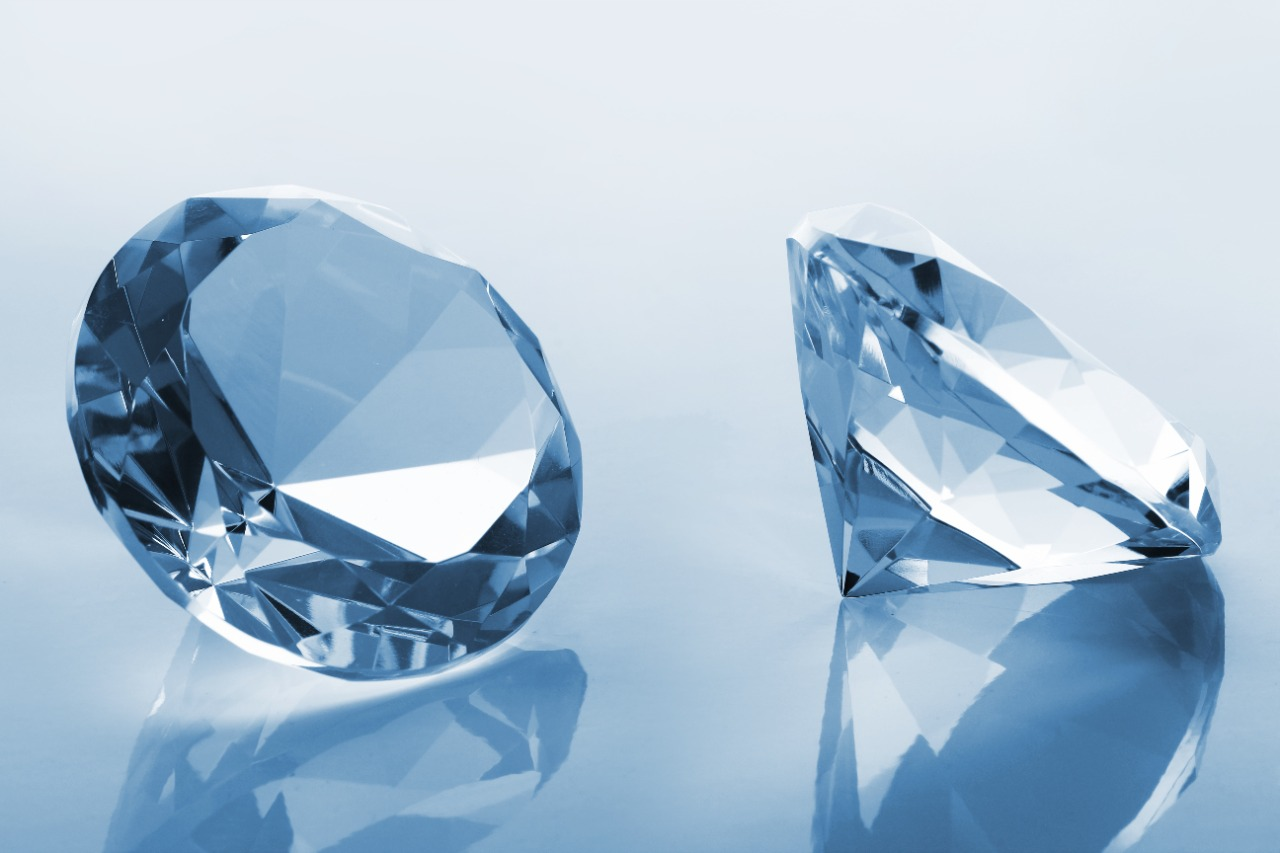

In [1]:
from IPython.display import Image
Image('img/big-beautiful-jewel.jpg')

# 2.0. IMPORTAÇÕES
---

## 2.1. Bibliotecas

In [2]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

## 2.2. Dados

In [5]:
df = pd.read_csv('data/diamonds.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
# Retirando a primeira coluna (index)
df = df.iloc[:, 1:]
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 2.3. Funções

In [7]:
def print_is_duplicated(df):
    """
    Função que verifica se os dados estão duplicados. Se sim,
    mostra a quantidade de dados duplicados.
    """
    confirmation = df.duplicated().values.any()
    print(f"Existem valores duplicados? {confirmation}")
    if confirmation == True:
        print(f"Existem no total {df.duplicated().sum()} linhas duplicadas.")
    else:
        print('Não existem linhas duplicadas.')

# 3.0. DESCRIÇÃO DOS DADOS
---

## 3.1. Descrição das variáveis

As descrições abaixo foram todas obtidas no site do dataset (Kaggle):

- ``price``: preço em dólares ($\$$326 até $\$$18,823).

- ``carat``: peso do diamante (0.2 até 5.01).*

- ``cut``: qualidade do corte:
    - *Fair:* razoável;
    - *Good:* bom;
    - *Very Good:* muito bom;
    - *Premium:* premium (melhor de todos);
    - *Ideal:* ideal.

- ``color``: cor do diamante, do D (melhor) até o J (pior).

- ``clarity``: uma medida de quão claro o diamante é. Seguindo a ordem a seguir, vai do pior até o melhor: (I1, SI2, SI1, VS2, VS1, VVS2, VVS1, IF).

- ``x``: comprimento em mm (0 até 10.74).

- ``y``: largura em mm (0 até 58.9).

- ``z``: espessura em mm (0 até 31.8).

- ``depth``: Porcentagem da espessura = $\frac{z}{\frac{(x+y)}{2}}$ (43--79).

- ``table``: largura do topo do diamante em relação ao ponto mais largo (43--95).

->* **Obs.:** Não há especificações da unidade do peso, porém o chute é em libras, por conta dos dados serem de lá.

## 3.2. Tipos das variáveis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Os tipos das variáveis parecem fazer sentido.

## 3.3. Verificação de valores nulos

In [9]:
# Soma de valores nulos por coluna
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Não existem valores nulos neste dataset, portanto nenhuma manipulação dos dados será necessária.

## 3.4. Valores duplicados

In [10]:
# Verifica se existem valores duplicados
print_is_duplicated(df)

Existem valores duplicados? True
Existem no total 146 linhas duplicadas.


In [11]:
# Porcentagem dos valores duplicados
duplicated_pct = round(df.duplicated().sum() / len(df) * 100, 2)
print(f"Existem {duplicated_pct}% linhas duplicadas neste dataset.")

Existem 0.27% linhas duplicadas neste dataset.


Como existem 0.27% linhas duplicadas no nosso conjunto, vamos excluí-las na seção 4.

## 3.5. Outliers

In [12]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Observamos um desvio padrão muito alto na variável ``price``, sendo até maior que a própria média. Vamos verificar o boxplot com esses valores.

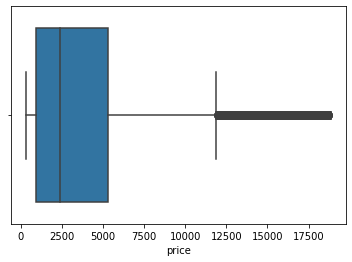

In [13]:
# Verificando outliers nos preços
sns.boxplot(x='price', data=df);

Resolvemos não retirar os outliers, pois os preços dos diamantes podem acabar variando muito, dependendo das outras características. Então assumimos que é são valores muito acima do esperado mas que são condizente com a realidade.

# 4.0. MANIPULAÇÃO DOS DADOS
---

## 4.1. Remoção dos valores duplicados

In [14]:
# Remove as linhas duplicadas
df = df.drop_duplicates()

print(f"Este dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
df.head()

Este dataset possui 53794 linhas e 10 colunas.


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 5.0. ANÁLISE EXPLORATÓRIA DOS DADOS
---

## 5.1. Análise de uma variável

### 5.1.1. Variável Resposta

In [20]:
sns.displot(x='price', data=df)

AttributeError: module 'seaborn' has no attribute 'displot'

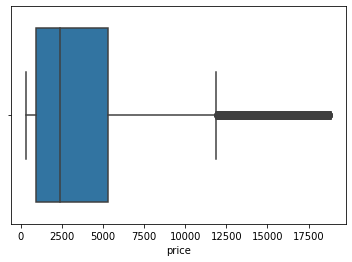

In [21]:
sns.boxplot(x='price', data=df);

## 5.1.2. Variáveis Categóricas

### cut

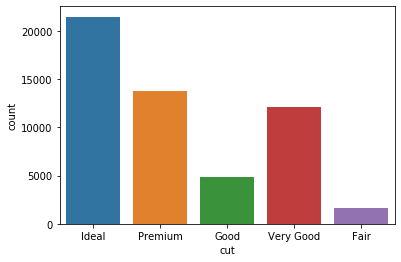

In [22]:
# Corte
sns.countplot(x='cut', data=df);

### color

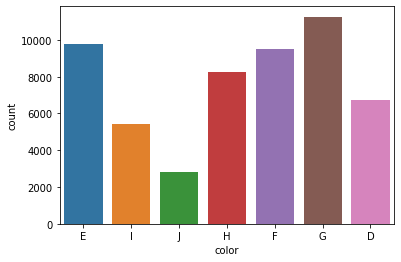

In [23]:
# Cor
sns.countplot(x='color', data=df);

### clarity

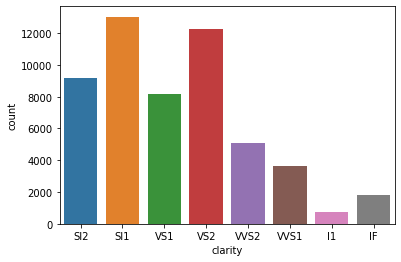

In [24]:
# Clareza
sns.countplot(x='clarity', data=df);

## 5.1.3. Variáveis Quantitativas

### x

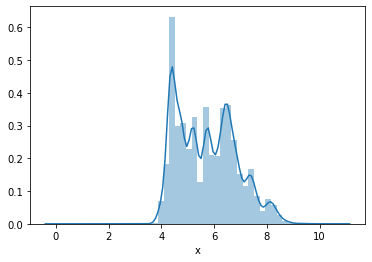

In [48]:
sns.distplot(df['x']);

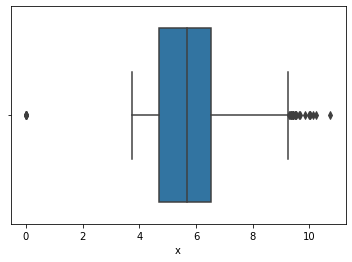

In [26]:
sns.boxplot(x='x', data=df);

### y

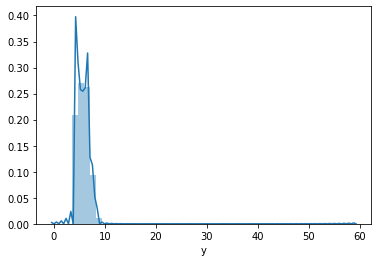

In [47]:
sns.distplot(df['y']);

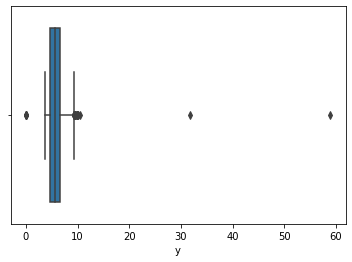

In [28]:
sns.boxplot(x='y', data=df);

### z

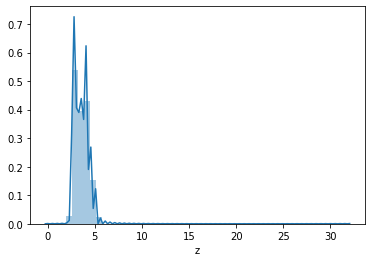

In [45]:
sns.distplot(df['z']);

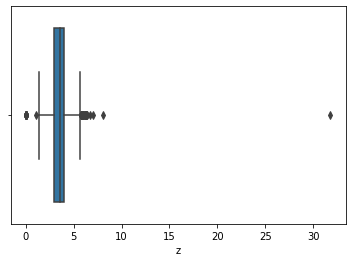

In [30]:
sns.boxplot(x='z', data=df);

### Depth

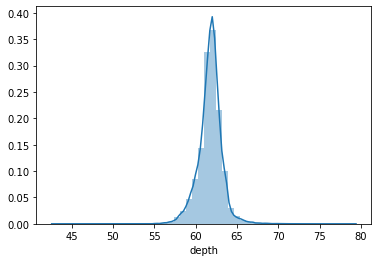

In [43]:
sns.distplot(df['depth'])

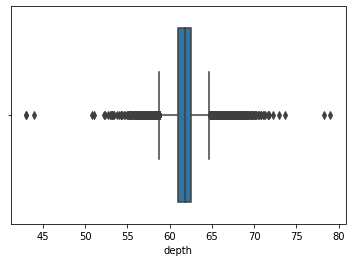

In [32]:
sns.boxplot(x='depth', data=df);

### table

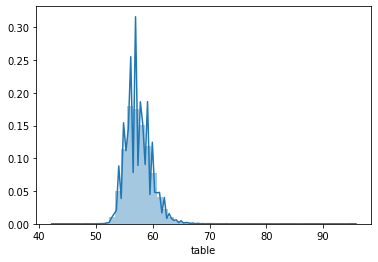

In [42]:
sns.distplot(df['table'])

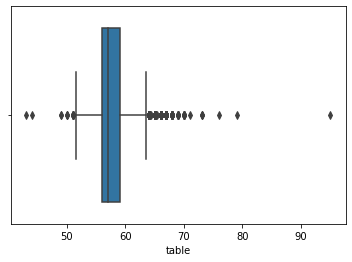

In [38]:
sns.boxplot(df['table']);

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

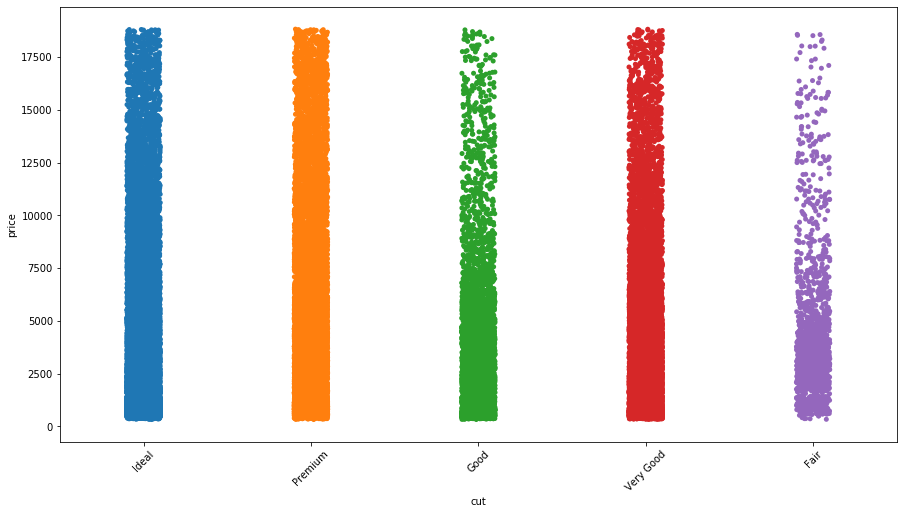

In [51]:
plt.figure(figsize=(15,8))
ax = sns.stripplot(x="cut", y="price", data=df)
plt.xticks(rotation=45)


# Modelos